In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
pd.set_option('display.max_columns', None)
import warnings #to ignore the warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline #when we plot, put it inline 

UsageError: unrecognized arguments: #when we plot, put it inline


In [2]:
df1 = pd.read_csv("marketing_customer_analysis.csv")
df1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Show DataFrame info

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Describe DataFrame

In [4]:
df1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#### Show a plot of the total number of responses.

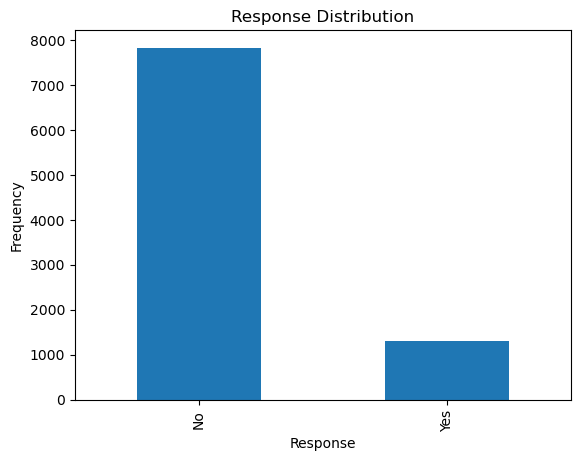

In [83]:
response_counts = df1['Response'].value_counts()
response_counts.plot.bar()
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Response Distribution')
plt.show()

#### Show a plot of the response rate by the sales channel.

In [14]:
value_counts = df1.groupby(['Sales Channel', 'Response'])['Response'].count()

result_dict = value_counts.to_dict()

print(value_counts)

Sales Channel  Response
Agent          No          2811
               Yes          666
Branch         No          2273
               Yes          294
Call Center    No          1573
               Yes          192
Web            No          1169
               Yes          156
Name: Response, dtype: int64


In [15]:
channel_response_rates = {}
for channel, response in value_counts.keys():
    if response == 'Yes':
        channel_response_rates[channel] = value_counts[(channel, response)] / sum(
            [value_counts[(channel, 'Yes')], value_counts[(channel, 'No')]]
        )

print(channel_response_rates)

{'Agent': 0.1915444348576359, 'Branch': 0.11453058044409817, 'Call Center': 0.10878186968838527, 'Web': 0.11773584905660377}


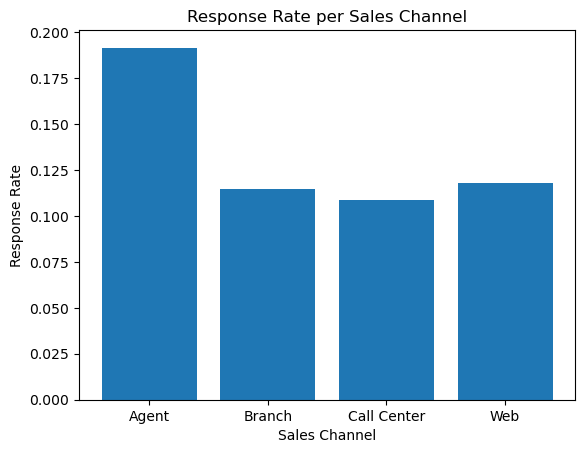

In [17]:
plt.bar(channel_response_rates.keys(), channel_response_rates.values())
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rate per Sales Channel')
plt.show()

#### Show a plot of the response rate by the total claim amount.

In [75]:
df1['Claim Amounts Bin'] = pd.cut(df1['Total Claim Amount'], bins=5)
value_counts = df1.groupby(['Claim Amounts Bin', 'Response'])['Response'].count().to_dict()
value_counts

{(Interval(-2.794, 578.727, closed='right'), 'No'): 6117,
 (Interval(-2.794, 578.727, closed='right'), 'Yes'): 1068,
 (Interval(578.727, 1157.355, closed='right'), 'No'): 1484,
 (Interval(578.727, 1157.355, closed='right'), 'Yes'): 204,
 (Interval(1157.355, 1735.983, closed='right'), 'No'): 183,
 (Interval(1157.355, 1735.983, closed='right'), 'Yes'): 36,
 (Interval(1735.983, 2314.612, closed='right'), 'No'): 36,
 (Interval(1735.983, 2314.612, closed='right'), 'Yes'): 0,
 (Interval(2314.612, 2893.24, closed='right'), 'No'): 6,
 (Interval(2314.612, 2893.24, closed='right'), 'Yes'): 0}

In [84]:
claima_response_rates = {}
for claima, response in value_counts.keys():
     if response == 'Yes':
        claima_response_rates[claima] = value_counts[(claima, response)] / sum(
            [value_counts[(claima, 'Yes')], value_counts[(claima, 'No')]])

claima_response_rates

{Interval(-2.794, 578.727, closed='right'): 0.14864300626304802,
 Interval(578.727, 1157.355, closed='right'): 0.12085308056872038,
 Interval(1157.355, 1735.983, closed='right'): 0.1643835616438356,
 Interval(1735.983, 2314.612, closed='right'): 0.0,
 Interval(2314.612, 2893.24, closed='right'): 0.0}

In [78]:
claima_bin_labels = []

for claima_labels in claima_response_rates.keys():
    claima_bin_labels.append(str(claima_labels))

claima_bin_labels

['(-2.794, 578.727]',
 '(578.727, 1157.355]',
 '(1157.355, 1735.983]',
 '(1735.983, 2314.612]',
 '(2314.612, 2893.24]']

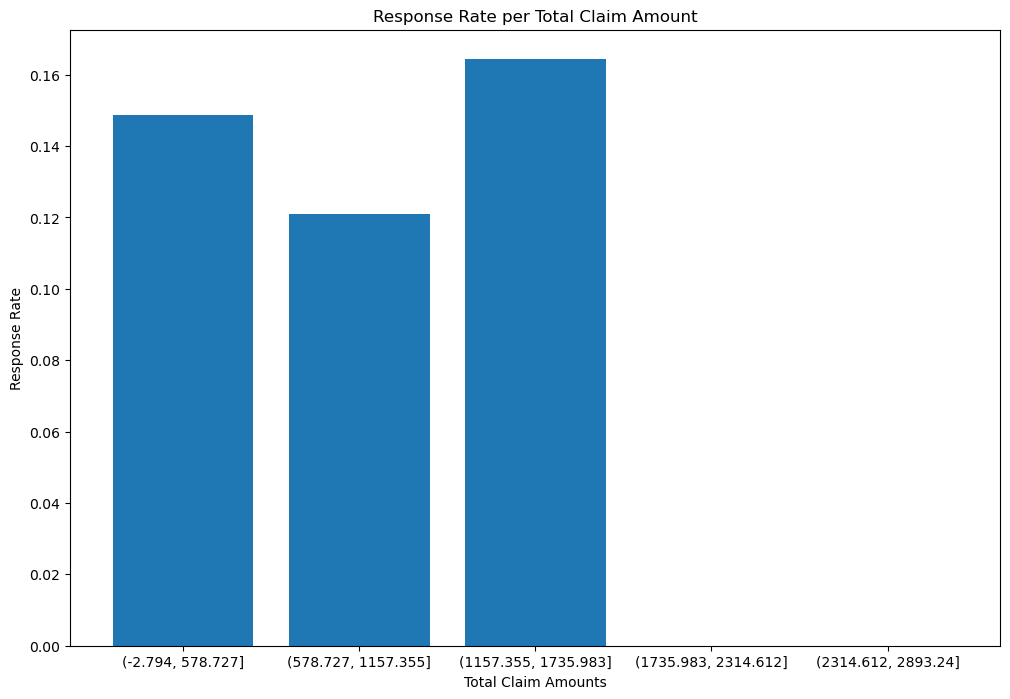

In [82]:
fig = plt.figure(figsize=(12, 8))
fig = plt.bar(claima_bin_labels, claima_response_rates.values())
plt.xlabel('Total Claim Amounts')
plt.ylabel('Response Rate')
plt.title('Response Rate per Total Claim Amount')
plt.show()

#### Show a plot of the response rate by income.

In [70]:
df1['Income Bin'] = pd.cut(df1['Income'], bins=5)

value_counts1 = df1.groupby(['Income Bin', 'Response'])['Response'].count().to_dict()

value_counts1

{(Interval(-99.981, 19996.2, closed='right'), 'No'): 2479,
 (Interval(-99.981, 19996.2, closed='right'), 'Yes'): 360,
 (Interval(19996.2, 39992.4, closed='right'), 'No'): 1866,
 (Interval(19996.2, 39992.4, closed='right'), 'Yes'): 408,
 (Interval(39992.4, 59988.6, closed='right'), 'No'): 1348,
 (Interval(39992.4, 59988.6, closed='right'), 'Yes'): 192,
 (Interval(59988.6, 79984.8, closed='right'), 'No'): 1223,
 (Interval(59988.6, 79984.8, closed='right'), 'Yes'): 234,
 (Interval(79984.8, 99981.0, closed='right'), 'No'): 910,
 (Interval(79984.8, 99981.0, closed='right'), 'Yes'): 114}

In [80]:
income_response_rates = {}
for income, response in value_counts1.keys():
    if response == 'Yes':
        income_response_rates[income] = value_counts1[(income, response)] / sum(
            [value_counts1[(income, 'Yes')], value_counts1[(income, 'No')]])

income_bin_labels = []

for income_labels in income_response_rates.keys():
    income_bin_labels.append(str(income_labels))

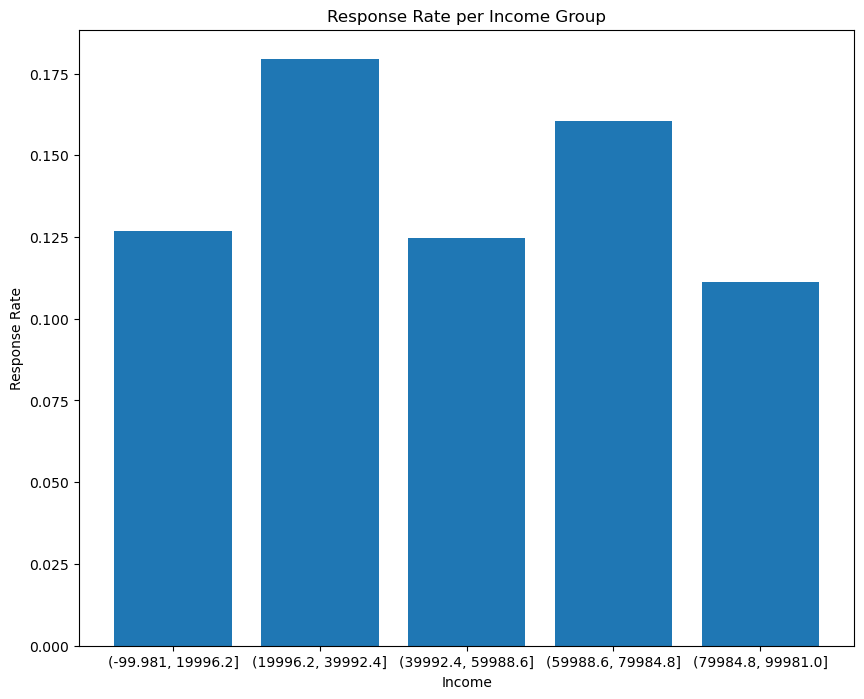

In [81]:
fig = plt.figure(figsize=(10, 8))
fig = plt.bar(income_bin_labels, income_response_rates.values())
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate per Income Group')
plt.show()